In [11]:
from sys import platform
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.svm import OneClassSVM
from pathlib import Path
import os.path
import warnings
warnings.filterwarnings("ignore")
import random

In [12]:
import tensorflow as tf  #tensor flow library to build and train CNN model

train_ds = tf.keras.utils.image_dataset_from_directory(  #load images irectly form library
    "../fruit_veggie_classification/train",
    image_size=(224, 224),
    batch_size=32
)
class_names = train_ds.class_names

# Print the class names
print("Class names:", class_names)

val_ds = tf.keras.utils.image_dataset_from_directory(
    "../fruit_veggie_classification/validation",
    image_size=(224, 224),
    batch_size=32
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    "../fruit_veggie_classification/test",
    image_size=(224, 224),
    batch_size=32
)


# Normalize the dataset 
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y)) # .map() function applies a function to each batch in the dataset
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3),
                                               include_top=False, 
                                               weights='imagenet')
base_model.trainable = False  # Freeze base model layers

model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(class_names), activation='softmax')  # Output layer
])



Found 3115 files belonging to 36 classes.
Class names: ['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']
Found 351 files belonging to 36 classes.
Found 359 files belonging to 36 classes.


In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [14]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    batch_size=32
)

Epoch 1/10
 4/98 ━━━━━━━━━━━━━━━━━━━━ 1:36 1s/step - accuracy: 0.0488 - loss: 3.7931

2025-04-08 11:52:05.086484: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 7/98 ━━━━━━━━━━━━━━━━━━━━ 1:42 1s/step - accuracy: 0.0707 - loss: 3.7234

2025-04-08 11:52:08.494853: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


14/98 ━━━━━━━━━━━━━━━━━━━━ 1:36 1s/step - accuracy: 0.1047 - loss: 3.5888

2025-04-08 11:52:17.352427: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


16/98 ━━━━━━━━━━━━━━━━━━━━ 1:35 1s/step - accuracy: 0.1144 - loss: 3.5504

2025-04-08 11:52:19.434096: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


18/98 ━━━━━━━━━━━━━━━━━━━━ 1:31 1s/step - accuracy: 0.1242 - loss: 3.5128

2025-04-08 11:52:21.741455: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


19/98 ━━━━━━━━━━━━━━━━━━━━ 1:29 1s/step - accuracy: 0.1291 - loss: 3.4946

2025-04-08 11:52:22.184793: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-04-08 11:52:22.637346: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


22/98 ━━━━━━━━━━━━━━━━━━━━ 1:26 1s/step - accuracy: 0.1438 - loss: 3.4417

2025-04-08 11:52:25.798658: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


27/98 ━━━━━━━━━━━━━━━━━━━━ 1:18 1s/step - accuracy: 0.1685 - loss: 3.3534

2025-04-08 11:52:30.489936: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 ━━━━━━━━━━━━━━━━━━━━ 1:15 1s/step - accuracy: 0.1832 - loss: 3.3003

2025-04-08 11:52:34.675306: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


32/98 ━━━━━━━━━━━━━━━━━━━━ 1:12 1s/step - accuracy: 0.1925 - loss: 3.2656

2025-04-08 11:52:36.546882: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


34/98 ━━━━━━━━━━━━━━━━━━━━ 1:10 1s/step - accuracy: 0.2016 - loss: 3.2310

2025-04-08 11:52:38.705403: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


36/98 ━━━━━━━━━━━━━━━━━━━━ 1:08 1s/step - accuracy: 0.2106 - loss: 3.1964

2025-04-08 11:52:40.451792: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


40/98 ━━━━━━━━━━━━━━━━━━━━ 1:04 1s/step - accuracy: 0.2279 - loss: 3.1281

2025-04-08 11:52:45.105514: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


50/98 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.2675 - loss: 2.9681

2025-04-08 11:52:55.027833: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


53/98 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.2779 - loss: 2.9243

2025-04-08 11:52:57.472096: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


61/98 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.3032 - loss: 2.8151

2025-04-08 11:53:05.842155: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/98 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.3062 - loss: 2.8022

2025-04-08 11:53:06.564478: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


67/98 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.3206 - loss: 2.7396

2025-04-08 11:53:11.321694: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-04-08 11:53:11.831600: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


68/98 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.3234 - loss: 2.7275

2025-04-08 11:53:12.194185: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


73/98 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.3365 - loss: 2.6693

2025-04-08 11:53:16.818939: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


85/98 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.3651 - loss: 2.5431

2025-04-08 11:53:26.416344: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 959ms/step - accuracy: 0.3919 - loss: 2.4247

2025-04-08 11:53:45.086121: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-04-08 11:53:47.936059: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 119s 1s/step - accuracy: 0.3938 - loss: 2.4164 - val_accuracy: 0.8860 - val_loss: 0.3738
Epoch 2/10


2025-04-08 11:53:55.061380: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 2/98 ━━━━━━━━━━━━━━━━━━━━ 1:27 906ms/step - accuracy: 0.8984 - loss: 0.4842

2025-04-08 11:53:56.183774: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 3/98 ━━━━━━━━━━━━━━━━━━━━ 1:24 890ms/step - accuracy: 0.8767 - loss: 0.5333

2025-04-08 11:53:57.239740: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 9/98 ━━━━━━━━━━━━━━━━━━━━ 1:19 890ms/step - accuracy: 0.8487 - loss: 0.6183

2025-04-08 11:54:02.569290: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


10/98 ━━━━━━━━━━━━━━━━━━━━ 1:17 877ms/step - accuracy: 0.8463 - loss: 0.6243

2025-04-08 11:54:03.471749: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


14/98 ━━━━━━━━━━━━━━━━━━━━ 1:13 874ms/step - accuracy: 0.8387 - loss: 0.6349

2025-04-08 11:54:06.749957: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-04-08 11:54:06.938017: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


24/98 ━━━━━━━━━━━━━━━━━━━━ 1:04 870ms/step - accuracy: 0.8298 - loss: 0.6445

2025-04-08 11:54:15.565882: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/98 ━━━━━━━━━━━━━━━━━━━━ 1:03 875ms/step - accuracy: 0.8291 - loss: 0.6449

2025-04-08 11:54:16.468476: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 ━━━━━━━━━━━━━━━━━━━━ 59s 875ms/step - accuracy: 0.8258 - loss: 0.6469 

2025-04-08 11:54:20.914924: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


33/98 ━━━━━━━━━━━━━━━━━━━━ 56s 876ms/step - accuracy: 0.8246 - loss: 0.6469

2025-04-08 11:54:23.533408: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


35/98 ━━━━━━━━━━━━━━━━━━━━ 55s 874ms/step - accuracy: 0.8240 - loss: 0.6469

2025-04-08 11:54:25.108501: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


36/98 ━━━━━━━━━━━━━━━━━━━━ 54s 873ms/step - accuracy: 0.8236 - loss: 0.6468

2025-04-08 11:54:25.967672: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


50/98 ━━━━━━━━━━━━━━━━━━━━ 42s 879ms/step - accuracy: 0.8211 - loss: 0.6416

2025-04-08 11:54:38.460486: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


53/98 ━━━━━━━━━━━━━━━━━━━━ 39s 880ms/step - accuracy: 0.8212 - loss: 0.6393

2025-04-08 11:54:41.291449: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


58/98 ━━━━━━━━━━━━━━━━━━━━ 34s 872ms/step - accuracy: 0.8216 - loss: 0.6350

2025-04-08 11:54:45.182687: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


59/98 ━━━━━━━━━━━━━━━━━━━━ 33s 871ms/step - accuracy: 0.8217 - loss: 0.6341

2025-04-08 11:54:45.952533: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/98 ━━━━━━━━━━━━━━━━━━━━ 31s 869ms/step - accuracy: 0.8222 - loss: 0.6311

2025-04-08 11:54:48.517950: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


63/98 ━━━━━━━━━━━━━━━━━━━━ 30s 868ms/step - accuracy: 0.8223 - loss: 0.6301

2025-04-08 11:54:49.343156: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


67/98 ━━━━━━━━━━━━━━━━━━━━ 26s 865ms/step - accuracy: 0.8230 - loss: 0.6262

2025-04-08 11:54:52.560603: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


71/98 ━━━━━━━━━━━━━━━━━━━━ 23s 865ms/step - accuracy: 0.8237 - loss: 0.6224

2025-04-08 11:54:56.093331: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


76/98 ━━━━━━━━━━━━━━━━━━━━ 18s 860ms/step - accuracy: 0.8246 - loss: 0.6179

2025-04-08 11:54:59.971012: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


79/98 ━━━━━━━━━━━━━━━━━━━━ 16s 863ms/step - accuracy: 0.8252 - loss: 0.6152

2025-04-08 11:55:02.718116: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 837ms/step - accuracy: 0.8293 - loss: 0.5987

2025-04-08 11:55:17.352123: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-04-08 11:55:22.353059: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 95s 960ms/step - accuracy: 0.8295 - loss: 0.5979 - val_accuracy: 0.9288 - val_loss: 0.2548
Epoch 3/10
 2/98 ━━━━━━━━━━━━━━━━━━━━ 1:30 941ms/step - accuracy: 0.8047 - loss: 0.6099

2025-04-08 11:55:31.760064: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 4/98 ━━━━━━━━━━━━━━━━━━━━ 1:31 969ms/step - accuracy: 0.8268 - loss: 0.5441

2025-04-08 11:55:33.282911: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 5/98 ━━━━━━━━━━━━━━━━━━━━ 1:30 975ms/step - accuracy: 0.8302 - loss: 0.5362

2025-04-08 11:55:34.421395: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 6/98 ━━━━━━━━━━━━━━━━━━━━ 1:28 967ms/step - accuracy: 0.8307 - loss: 0.5348

2025-04-08 11:55:35.607933: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/98 ━━━━━━━━━━━━━━━━━━━━ 1:23 966ms/step - accuracy: 0.8463 - loss: 0.5060

2025-04-08 11:55:39.836779: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


16/98 ━━━━━━━━━━━━━━━━━━━━ 1:17 941ms/step - accuracy: 0.8562 - loss: 0.4848

2025-04-08 11:55:44.342936: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-04-08 11:55:44.349478: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


19/98 ━━━━━━━━━━━━━━━━━━━━ 1:12 918ms/step - accuracy: 0.8609 - loss: 0.4730

2025-04-08 11:55:46.876070: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


24/98 ━━━━━━━━━━━━━━━━━━━━ 1:06 896ms/step - accuracy: 0.8678 - loss: 0.4566

2025-04-08 11:55:50.977658: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/98 ━━━━━━━━━━━━━━━━━━━━ 1:05 891ms/step - accuracy: 0.8689 - loss: 0.4541

2025-04-08 11:55:51.679385: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


28/98 ━━━━━━━━━━━━━━━━━━━━ 1:01 883ms/step - accuracy: 0.8720 - loss: 0.4466

2025-04-08 11:55:54.052912: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


38/98 ━━━━━━━━━━━━━━━━━━━━ 54s 903ms/step - accuracy: 0.8789 - loss: 0.4289

2025-04-08 11:56:03.677167: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


47/98 ━━━━━━━━━━━━━━━━━━━━ 46s 903ms/step - accuracy: 0.8819 - loss: 0.4192

2025-04-08 11:56:11.742195: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


49/98 ━━━━━━━━━━━━━━━━━━━━ 44s 908ms/step - accuracy: 0.8824 - loss: 0.4175

2025-04-08 11:56:13.763086: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-04-08 11:56:13.848775: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


52/98 ━━━━━━━━━━━━━━━━━━━━ 41s 904ms/step - accuracy: 0.8834 - loss: 0.4147

2025-04-08 11:56:16.331256: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


56/98 ━━━━━━━━━━━━━━━━━━━━ 38s 908ms/step - accuracy: 0.8846 - loss: 0.4110

2025-04-08 11:56:20.340434: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


58/98 ━━━━━━━━━━━━━━━━━━━━ 36s 907ms/step - accuracy: 0.8851 - loss: 0.4092

2025-04-08 11:56:21.980480: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/98 ━━━━━━━━━━━━━━━━━━━━ 32s 898ms/step - accuracy: 0.8860 - loss: 0.4059

2025-04-08 11:56:24.968154: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


64/98 ━━━━━━━━━━━━━━━━━━━━ 30s 894ms/step - accuracy: 0.8865 - loss: 0.4042

2025-04-08 11:56:26.564908: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 28s 894ms/step - accuracy: 0.8870 - loss: 0.4026

2025-04-08 11:56:28.488226: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


75/98 ━━━━━━━━━━━━━━━━━━━━ 20s 894ms/step - accuracy: 0.8888 - loss: 0.3962

2025-04-08 11:56:36.621414: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


80/98 ━━━━━━━━━━━━━━━━━━━━ 16s 901ms/step - accuracy: 0.8898 - loss: 0.3928

2025-04-08 11:56:41.507641: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 871ms/step - accuracy: 0.8927 - loss: 0.3822

2025-04-08 11:56:56.441696: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-04-08 11:56:57.833838: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 96s 975ms/step - accuracy: 0.8928 - loss: 0.3817 - val_accuracy: 0.9487 - val_loss: 0.1886
Epoch 4/10
 2/98 ━━━━━━━━━━━━━━━━━━━━ 1:29 932ms/step - accuracy: 0.9141 - loss: 0.2794

2025-04-08 11:57:07.159591: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-04-08 11:57:08.071389: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 6/98 ━━━━━━━━━━━━━━━━━━━━ 1:25 932ms/step - accuracy: 0.9234 - loss: 0.2758

2025-04-08 11:57:11.741628: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 8/98 ━━━━━━━━━━━━━━━━━━━━ 1:25 953ms/step - accuracy: 0.9207 - loss: 0.2746

2025-04-08 11:57:13.619058: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


13/98 ━━━━━━━━━━━━━━━━━━━━ 1:15 890ms/step - accuracy: 0.9196 - loss: 0.2719

2025-04-08 11:57:17.102814: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


18/98 ━━━━━━━━━━━━━━━━━━━━ 1:10 876ms/step - accuracy: 0.9220 - loss: 0.2664

2025-04-08 11:57:21.566357: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-04-08 11:57:21.594236: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


23/98 ━━━━━━━━━━━━━━━━━━━━ 1:03 853ms/step - accuracy: 0.9242 - loss: 0.2632

2025-04-08 11:57:25.258004: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


29/98 ━━━━━━━━━━━━━━━━━━━━ 57s 839ms/step - accuracy: 0.9259 - loss: 0.2593

2025-04-08 11:57:29.932777: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-04-08 11:57:30.102803: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


38/98 ━━━━━━━━━━━━━━━━━━━━ 49s 825ms/step - accuracy: 0.9277 - loss: 0.2545

2025-04-08 11:57:36.981495: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


40/98 ━━━━━━━━━━━━━━━━━━━━ 47s 823ms/step - accuracy: 0.9279 - loss: 0.2537

2025-04-08 11:57:38.637224: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


42/98 ━━━━━━━━━━━━━━━━━━━━ 45s 819ms/step - accuracy: 0.9282 - loss: 0.2528

2025-04-08 11:57:40.485019: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


47/98 ━━━━━━━━━━━━━━━━━━━━ 41s 817ms/step - accuracy: 0.9284 - loss: 0.2517

2025-04-08 11:57:44.304009: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


52/98 ━━━━━━━━━━━━━━━━━━━━ 37s 810ms/step - accuracy: 0.9288 - loss: 0.2505

2025-04-08 11:57:47.819373: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


54/98 ━━━━━━━━━━━━━━━━━━━━ 35s 808ms/step - accuracy: 0.9290 - loss: 0.2499

2025-04-08 11:57:49.387258: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


58/98 ━━━━━━━━━━━━━━━━━━━━ 32s 805ms/step - accuracy: 0.9295 - loss: 0.2486

2025-04-08 11:57:52.337746: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


59/98 ━━━━━━━━━━━━━━━━━━━━ 31s 804ms/step - accuracy: 0.9296 - loss: 0.2483

2025-04-08 11:57:53.165946: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


60/98 ━━━━━━━━━━━━━━━━━━━━ 30s 802ms/step - accuracy: 0.9298 - loss: 0.2479

2025-04-08 11:57:53.749362: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


61/98 ━━━━━━━━━━━━━━━━━━━━ 29s 800ms/step - accuracy: 0.9299 - loss: 0.2476

2025-04-08 11:57:54.515648: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 25s 794ms/step - accuracy: 0.9305 - loss: 0.2461

2025-04-08 11:57:58.183807: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


70/98 ━━━━━━━━━━━━━━━━━━━━ 22s 791ms/step - accuracy: 0.9310 - loss: 0.2448

2025-04-08 11:58:01.198102: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 18s 787ms/step - accuracy: 0.9315 - loss: 0.2436

2025-04-08 11:58:03.909828: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 749ms/step - accuracy: 0.9344 - loss: 0.2363

2025-04-08 11:58:19.090491: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-04-08 11:58:20.965480: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 83s 841ms/step - accuracy: 0.9345 - loss: 0.2360 - val_accuracy: 0.9516 - val_loss: 0.1667
Epoch 5/10


2025-04-08 11:58:29.187806: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 7/98 ━━━━━━━━━━━━━━━━━━━━ 1:21 894ms/step - accuracy: 0.9503 - loss: 0.1975

2025-04-08 11:58:35.212495: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-04-08 11:58:35.501706: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 8/98 ━━━━━━━━━━━━━━━━━━━━ 1:21 903ms/step - accuracy: 0.9512 - loss: 0.1946

2025-04-08 11:58:36.194790: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


10/98 ━━━━━━━━━━━━━━━━━━━━ 1:19 903ms/step - accuracy: 0.9508 - loss: 0.1918

2025-04-08 11:58:37.841538: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


16/98 ━━━━━━━━━━━━━━━━━━━━ 1:09 843ms/step - accuracy: 0.9487 - loss: 0.1919

2025-04-08 11:58:42.366962: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


22/98 ━━━━━━━━━━━━━━━━━━━━ 1:02 817ms/step - accuracy: 0.9476 - loss: 0.1908

2025-04-08 11:58:46.804167: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/98 ━━━━━━━━━━━━━━━━━━━━ 59s 810ms/step - accuracy: 0.9476 - loss: 0.1897 

2025-04-08 11:58:49.081176: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


27/98 ━━━━━━━━━━━━━━━━━━━━ 57s 804ms/step - accuracy: 0.9477 - loss: 0.1887

2025-04-08 11:58:50.525469: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-04-08 11:58:50.551977: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


34/98 ━━━━━━━━━━━━━━━━━━━━ 51s 799ms/step - accuracy: 0.9488 - loss: 0.1855

2025-04-08 11:58:55.983902: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


36/98 ━━━━━━━━━━━━━━━━━━━━ 49s 800ms/step - accuracy: 0.9492 - loss: 0.1846

2025-04-08 11:58:57.742321: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 ━━━━━━━━━━━━━━━━━━━━ 47s 801ms/step - accuracy: 0.9496 - loss: 0.1836

2025-04-08 11:59:00.395323: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


44/98 ━━━━━━━━━━━━━━━━━━━━ 43s 799ms/step - accuracy: 0.9501 - loss: 0.1819

2025-04-08 11:59:03.948522: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


53/98 ━━━━━━━━━━━━━━━━━━━━ 35s 788ms/step - accuracy: 0.9510 - loss: 0.1794

2025-04-08 11:59:10.757488: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


54/98 ━━━━━━━━━━━━━━━━━━━━ 34s 790ms/step - accuracy: 0.9511 - loss: 0.1792

2025-04-08 11:59:11.441357: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


56/98 ━━━━━━━━━━━━━━━━━━━━ 33s 788ms/step - accuracy: 0.9512 - loss: 0.1788

2025-04-08 11:59:12.943358: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


60/98 ━━━━━━━━━━━━━━━━━━━━ 29s 784ms/step - accuracy: 0.9514 - loss: 0.1780

2025-04-08 11:59:15.949246: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 24s 776ms/step - accuracy: 0.9517 - loss: 0.1770

2025-04-08 11:59:20.231087: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


69/98 ━━━━━━━━━━━━━━━━━━━━ 22s 775ms/step - accuracy: 0.9519 - loss: 0.1765

2025-04-08 11:59:22.407635: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


70/98 ━━━━━━━━━━━━━━━━━━━━ 21s 773ms/step - accuracy: 0.9519 - loss: 0.1763

2025-04-08 11:59:23.015507: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-04-08 11:59:23.143501: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


81/98 ━━━━━━━━━━━━━━━━━━━━ 13s 772ms/step - accuracy: 0.9525 - loss: 0.1749

2025-04-08 11:59:31.373702: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 747ms/step - accuracy: 0.9536 - loss: 0.1720

2025-04-08 11:59:44.611905: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-04-08 11:59:47.103799: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 84s 853ms/step - accuracy: 0.9537 - loss: 0.1718 - val_accuracy: 0.9601 - val_loss: 0.1389
Epoch 6/10
 1/98 ━━━━━━━━━━━━━━━━━━━━ 2:24 1s/step - accuracy: 0.9688 - loss: 0.1709

2025-04-08 11:59:53.733267: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-04-08 11:59:54.133060: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 5/98 ━━━━━━━━━━━━━━━━━━━━ 1:24 905ms/step - accuracy: 0.9688 - loss: 0.1519

2025-04-08 11:59:57.284469: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 7/98 ━━━━━━━━━━━━━━━━━━━━ 1:24 927ms/step - accuracy: 0.9688 - loss: 0.1490

2025-04-08 11:59:59.829899: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 8/98 ━━━━━━━━━━━━━━━━━━━━ 1:24 939ms/step - accuracy: 0.9678 - loss: 0.1489

2025-04-08 12:00:00.753478: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-04-08 12:00:00.978938: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


15/98 ━━━━━━━━━━━━━━━━━━━━ 1:11 857ms/step - accuracy: 0.9653 - loss: 0.1456

2025-04-08 12:00:05.810873: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


17/98 ━━━━━━━━━━━━━━━━━━━━ 1:08 843ms/step - accuracy: 0.9651 - loss: 0.1443

2025-04-08 12:00:07.370596: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


23/98 ━━━━━━━━━━━━━━━━━━━━ 1:01 823ms/step - accuracy: 0.9654 - loss: 0.1400

2025-04-08 12:00:12.097625: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


24/98 ━━━━━━━━━━━━━━━━━━━━ 1:00 819ms/step - accuracy: 0.9656 - loss: 0.1393

2025-04-08 12:00:12.669931: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


31/98 ━━━━━━━━━━━━━━━━━━━━ 54s 810ms/step - accuracy: 0.9663 - loss: 0.1362

2025-04-08 12:00:18.165160: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


33/98 ━━━━━━━━━━━━━━━━━━━━ 52s 809ms/step - accuracy: 0.9664 - loss: 0.1357

2025-04-08 12:00:19.744347: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


36/98 ━━━━━━━━━━━━━━━━━━━━ 49s 803ms/step - accuracy: 0.9666 - loss: 0.1350

2025-04-08 12:00:22.116974: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


49/98 ━━━━━━━━━━━━━━━━━━━━ 38s 790ms/step - accuracy: 0.9673 - loss: 0.1315

2025-04-08 12:00:31.738570: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


51/98 ━━━━━━━━━━━━━━━━━━━━ 37s 788ms/step - accuracy: 0.9674 - loss: 0.1309

2025-04-08 12:00:33.200852: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


57/98 ━━━━━━━━━━━━━━━━━━━━ 32s 782ms/step - accuracy: 0.9678 - loss: 0.1293

2025-04-08 12:00:37.621860: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-04-08 12:00:37.648801: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-04-08 12:00:37.667047: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


65/98 ━━━━━━━━━━━━━━━━━━━━ 25s 778ms/step - accuracy: 0.9680 - loss: 0.1276

2025-04-08 12:00:43.645038: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


69/98 ━━━━━━━━━━━━━━━━━━━━ 22s 778ms/step - accuracy: 0.9681 - loss: 0.1269

2025-04-08 12:00:46.747340: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


71/98 ━━━━━━━━━━━━━━━━━━━━ 21s 779ms/step - accuracy: 0.9680 - loss: 0.1266

2025-04-08 12:00:48.307981: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


75/98 ━━━━━━━━━━━━━━━━━━━━ 17s 781ms/step - accuracy: 0.9680 - loss: 0.1260

2025-04-08 12:00:51.631554: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


76/98 ━━━━━━━━━━━━━━━━━━━━ 17s 780ms/step - accuracy: 0.9680 - loss: 0.1259

2025-04-08 12:00:52.384546: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 750ms/step - accuracy: 0.9684 - loss: 0.1228

2025-04-08 12:01:06.996089: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-04-08 12:01:10.192583: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 83s 842ms/step - accuracy: 0.9684 - loss: 0.1227 - val_accuracy: 0.9601 - val_loss: 0.1219
Epoch 7/10


2025-04-08 12:01:16.622888: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 6/98 ━━━━━━━━━━━━━━━━━━━━ 1:26 941ms/step - accuracy: 0.9821 - loss: 0.1195

2025-04-08 12:01:22.096730: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-04-08 12:01:22.483958: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-04-08 12:01:22.545638: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 7/98 ━━━━━━━━━━━━━━━━━━━━ 1:25 941ms/step - accuracy: 0.9828 - loss: 0.1160

2025-04-08 12:01:22.850889: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


10/98 ━━━━━━━━━━━━━━━━━━━━ 1:18 896ms/step - accuracy: 0.9837 - loss: 0.1084

2025-04-08 12:01:25.169623: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


14/98 ━━━━━━━━━━━━━━━━━━━━ 1:11 848ms/step - accuracy: 0.9838 - loss: 0.1040

2025-04-08 12:01:28.130750: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


16/98 ━━━━━━━━━━━━━━━━━━━━ 1:08 831ms/step - accuracy: 0.9832 - loss: 0.1034

2025-04-08 12:01:29.606035: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


22/98 ━━━━━━━━━━━━━━━━━━━━ 1:02 821ms/step - accuracy: 0.9829 - loss: 0.1008

2025-04-08 12:01:34.397845: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


23/98 ━━━━━━━━━━━━━━━━━━━━ 1:01 822ms/step - accuracy: 0.9830 - loss: 0.1004

2025-04-08 12:01:35.278688: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 ━━━━━━━━━━━━━━━━━━━━ 55s 814ms/step - accuracy: 0.9828 - loss: 0.0978

2025-04-08 12:01:40.741918: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


31/98 ━━━━━━━━━━━━━━━━━━━━ 54s 810ms/step - accuracy: 0.9827 - loss: 0.0976

2025-04-08 12:01:41.397481: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-04-08 12:01:41.608834: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


40/98 ━━━━━━━━━━━━━━━━━━━━ 46s 801ms/step - accuracy: 0.9827 - loss: 0.0951

2025-04-08 12:01:48.417049: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


56/98 ━━━━━━━━━━━━━━━━━━━━ 33s 794ms/step - accuracy: 0.9826 - loss: 0.0920

2025-04-08 12:02:00.961575: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


58/98 ━━━━━━━━━━━━━━━━━━━━ 31s 790ms/step - accuracy: 0.9826 - loss: 0.0917

2025-04-08 12:02:02.299619: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


59/98 ━━━━━━━━━━━━━━━━━━━━ 30s 789ms/step - accuracy: 0.9825 - loss: 0.0916

2025-04-08 12:02:02.991398: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


60/98 ━━━━━━━━━━━━━━━━━━━━ 29s 789ms/step - accuracy: 0.9825 - loss: 0.0914

2025-04-08 12:02:03.982051: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


61/98 ━━━━━━━━━━━━━━━━━━━━ 29s 792ms/step - accuracy: 0.9825 - loss: 0.0913

2025-04-08 12:02:04.685558: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/98 ━━━━━━━━━━━━━━━━━━━━ 28s 792ms/step - accuracy: 0.9825 - loss: 0.0911

2025-04-08 12:02:05.414899: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


64/98 ━━━━━━━━━━━━━━━━━━━━ 26s 791ms/step - accuracy: 0.9825 - loss: 0.0909

2025-04-08 12:02:07.214635: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


68/98 ━━━━━━━━━━━━━━━━━━━━ 23s 790ms/step - accuracy: 0.9825 - loss: 0.0904

2025-04-08 12:02:10.094416: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 18s 786ms/step - accuracy: 0.9824 - loss: 0.0898

2025-04-08 12:02:14.523024: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 755ms/step - accuracy: 0.9822 - loss: 0.0881

2025-04-08 12:02:33.076036: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-04-08 12:02:35.310413: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 84s 853ms/step - accuracy: 0.9821 - loss: 0.0881 - val_accuracy: 0.9516 - val_loss: 0.1481
Epoch 8/10


2025-04-08 12:02:40.609316: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 3/98 ━━━━━━━━━━━━━━━━━━━━ 1:25 900ms/step - accuracy: 0.9774 - loss: 0.0941

2025-04-08 12:02:43.080462: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 4/98 ━━━━━━━━━━━━━━━━━━━━ 1:23 891ms/step - accuracy: 0.9714 - loss: 0.1046

2025-04-08 12:02:44.370263: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 5/98 ━━━━━━━━━━━━━━━━━━━━ 1:22 892ms/step - accuracy: 0.9683 - loss: 0.1074

2025-04-08 12:02:45.437299: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


10/98 ━━━━━━━━━━━━━━━━━━━━ 1:19 901ms/step - accuracy: 0.9643 - loss: 0.1078

2025-04-08 12:02:49.515123: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


18/98 ━━━━━━━━━━━━━━━━━━━━ 1:07 846ms/step - accuracy: 0.9677 - loss: 0.0993

2025-04-08 12:02:55.601190: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 1:04 834ms/step - accuracy: 0.9686 - loss: 0.0968

2025-04-08 12:02:58.044341: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


22/98 ━━━━━━━━━━━━━━━━━━━━ 1:03 832ms/step - accuracy: 0.9688 - loss: 0.0962

2025-04-08 12:02:58.733986: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/98 ━━━━━━━━━━━━━━━━━━━━ 1:00 826ms/step - accuracy: 0.9691 - loss: 0.0946

2025-04-08 12:03:01.041492: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-04-08 12:03:01.150730: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 ━━━━━━━━━━━━━━━━━━━━ 55s 821ms/step - accuracy: 0.9695 - loss: 0.0929

2025-04-08 12:03:05.034910: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


36/98 ━━━━━━━━━━━━━━━━━━━━ 50s 815ms/step - accuracy: 0.9699 - loss: 0.0914

2025-04-08 12:03:09.758486: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


37/98 ━━━━━━━━━━━━━━━━━━━━ 49s 816ms/step - accuracy: 0.9699 - loss: 0.0912

2025-04-08 12:03:10.911246: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


43/98 ━━━━━━━━━━━━━━━━━━━━ 44s 815ms/step - accuracy: 0.9703 - loss: 0.0901

2025-04-08 12:03:15.498644: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


48/98 ━━━━━━━━━━━━━━━━━━━━ 40s 808ms/step - accuracy: 0.9706 - loss: 0.0891

2025-04-08 12:03:19.183909: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


55/98 ━━━━━━━━━━━━━━━━━━━━ 34s 799ms/step - accuracy: 0.9713 - loss: 0.0876

2025-04-08 12:03:24.494969: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


56/98 ━━━━━━━━━━━━━━━━━━━━ 33s 799ms/step - accuracy: 0.9713 - loss: 0.0874

2025-04-08 12:03:25.173689: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


61/98 ━━━━━━━━━━━━━━━━━━━━ 29s 800ms/step - accuracy: 0.9718 - loss: 0.0865

2025-04-08 12:03:29.163857: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-04-08 12:03:29.339148: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


63/98 ━━━━━━━━━━━━━━━━━━━━ 27s 797ms/step - accuracy: 0.9720 - loss: 0.0862

2025-04-08 12:03:30.626587: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-04-08 12:03:30.642165: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 25s 798ms/step - accuracy: 0.9722 - loss: 0.0857

2025-04-08 12:03:33.053024: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


73/98 ━━━━━━━━━━━━━━━━━━━━ 19s 795ms/step - accuracy: 0.9728 - loss: 0.0846

2025-04-08 12:03:38.465682: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 762ms/step - accuracy: 0.9747 - loss: 0.0814

2025-04-08 12:04:00.125473: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-04-08 12:04:00.474156: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 85s 860ms/step - accuracy: 0.9747 - loss: 0.0813 - val_accuracy: 0.9658 - val_loss: 0.1256
Epoch 9/10
 1/98 ━━━━━━━━━━━━━━━━━━━━ 2:11 1s/step - accuracy: 0.9688 - loss: 0.1194

2025-04-08 12:04:06.236009: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 2/98 ━━━━━━━━━━━━━━━━━━━━ 1:26 898ms/step - accuracy: 0.9688 - loss: 0.1061

2025-04-08 12:04:07.149565: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 3/98 ━━━━━━━━━━━━━━━━━━━━ 1:25 895ms/step - accuracy: 0.9722 - loss: 0.0955

2025-04-08 12:04:07.959196: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 6/98 ━━━━━━━━━━━━━━━━━━━━ 1:24 915ms/step - accuracy: 0.9788 - loss: 0.0809

2025-04-08 12:04:10.984034: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


12/98 ━━━━━━━━━━━━━━━━━━━━ 1:13 850ms/step - accuracy: 0.9805 - loss: 0.0804

2025-04-08 12:04:15.323396: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


13/98 ━━━━━━━━━━━━━━━━━━━━ 1:11 842ms/step - accuracy: 0.9803 - loss: 0.0816

2025-04-08 12:04:16.060287: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 1:04 836ms/step - accuracy: 0.9811 - loss: 0.0823

2025-04-08 12:04:22.677226: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


24/98 ━━━━━━━━━━━━━━━━━━━━ 1:00 822ms/step - accuracy: 0.9817 - loss: 0.0810

2025-04-08 12:04:25.049731: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


26/98 ━━━━━━━━━━━━━━━━━━━━ 59s 823ms/step - accuracy: 0.9822 - loss: 0.0801 

2025-04-08 12:04:26.514491: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


27/98 ━━━━━━━━━━━━━━━━━━━━ 58s 820ms/step - accuracy: 0.9823 - loss: 0.0797

2025-04-08 12:04:27.281189: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


37/98 ━━━━━━━━━━━━━━━━━━━━ 49s 816ms/step - accuracy: 0.9822 - loss: 0.0771

2025-04-08 12:04:35.344954: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


40/98 ━━━━━━━━━━━━━━━━━━━━ 47s 814ms/step - accuracy: 0.9822 - loss: 0.0766

2025-04-08 12:04:37.774004: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


48/98 ━━━━━━━━━━━━━━━━━━━━ 40s 804ms/step - accuracy: 0.9819 - loss: 0.0754

2025-04-08 12:04:43.814264: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


51/98 ━━━━━━━━━━━━━━━━━━━━ 37s 798ms/step - accuracy: 0.9819 - loss: 0.0750

2025-04-08 12:04:46.053524: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


54/98 ━━━━━━━━━━━━━━━━━━━━ 34s 794ms/step - accuracy: 0.9818 - loss: 0.0747

2025-04-08 12:04:48.072895: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


57/98 ━━━━━━━━━━━━━━━━━━━━ 32s 794ms/step - accuracy: 0.9818 - loss: 0.0743

2025-04-08 12:04:50.436711: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-04-08 12:04:50.490484: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


58/98 ━━━━━━━━━━━━━━━━━━━━ 31s 795ms/step - accuracy: 0.9818 - loss: 0.0742

2025-04-08 12:04:51.646110: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


64/98 ━━━━━━━━━━━━━━━━━━━━ 27s 795ms/step - accuracy: 0.9817 - loss: 0.0736

2025-04-08 12:04:56.301330: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


68/98 ━━━━━━━━━━━━━━━━━━━━ 23s 796ms/step - accuracy: 0.9816 - loss: 0.0732

2025-04-08 12:04:59.259101: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


72/98 ━━━━━━━━━━━━━━━━━━━━ 20s 797ms/step - accuracy: 0.9815 - loss: 0.0729

2025-04-08 12:05:02.599525: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


73/98 ━━━━━━━━━━━━━━━━━━━━ 19s 796ms/step - accuracy: 0.9815 - loss: 0.0728

2025-04-08 12:05:03.444244: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


76/98 ━━━━━━━━━━━━━━━━━━━━ 17s 795ms/step - accuracy: 0.9814 - loss: 0.0727

2025-04-08 12:05:05.680022: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 764ms/step - accuracy: 0.9808 - loss: 0.0720

2025-04-08 12:05:21.441732: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-04-08 12:05:24.900405: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 84s 857ms/step - accuracy: 0.9808 - loss: 0.0720 - val_accuracy: 0.9601 - val_loss: 0.1279
Epoch 10/10
 2/98 ━━━━━━━━━━━━━━━━━━━━ 1:26 899ms/step - accuracy: 0.9922 - loss: 0.0351

2025-04-08 12:05:31.860181: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 8/98 ━━━━━━━━━━━━━━━━━━━━ 1:22 918ms/step - accuracy: 0.9812 - loss: 0.0609

2025-04-08 12:05:37.274848: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


12/98 ━━━━━━━━━━━━━━━━━━━━ 1:16 888ms/step - accuracy: 0.9808 - loss: 0.0642

2025-04-08 12:05:40.107039: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-04-08 12:05:40.114909: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


13/98 ━━━━━━━━━━━━━━━━━━━━ 1:14 880ms/step - accuracy: 0.9808 - loss: 0.0644

2025-04-08 12:05:41.006676: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


14/98 ━━━━━━━━━━━━━━━━━━━━ 1:13 871ms/step - accuracy: 0.9807 - loss: 0.0646

2025-04-08 12:05:41.709238: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


24/98 ━━━━━━━━━━━━━━━━━━━━ 1:01 827ms/step - accuracy: 0.9805 - loss: 0.0658

2025-04-08 12:05:49.534592: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


27/98 ━━━━━━━━━━━━━━━━━━━━ 58s 828ms/step - accuracy: 0.9806 - loss: 0.0659

2025-04-08 12:05:51.973921: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


29/98 ━━━━━━━━━━━━━━━━━━━━ 57s 832ms/step - accuracy: 0.9807 - loss: 0.0657

2025-04-08 12:05:53.689226: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-04-08 12:05:53.831143: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


36/98 ━━━━━━━━━━━━━━━━━━━━ 50s 820ms/step - accuracy: 0.9813 - loss: 0.0644

2025-04-08 12:05:59.056211: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


37/98 ━━━━━━━━━━━━━━━━━━━━ 49s 819ms/step - accuracy: 0.9813 - loss: 0.0643

2025-04-08 12:06:00.215409: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


38/98 ━━━━━━━━━━━━━━━━━━━━ 49s 818ms/step - accuracy: 0.9814 - loss: 0.0641

2025-04-08 12:06:00.760744: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


41/98 ━━━━━━━━━━━━━━━━━━━━ 46s 812ms/step - accuracy: 0.9815 - loss: 0.0639

2025-04-08 12:06:03.110303: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


53/98 ━━━━━━━━━━━━━━━━━━━━ 36s 810ms/step - accuracy: 0.9819 - loss: 0.0639

2025-04-08 12:06:12.488092: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


55/98 ━━━━━━━━━━━━━━━━━━━━ 34s 807ms/step - accuracy: 0.9819 - loss: 0.0639

2025-04-08 12:06:14.011474: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


63/98 ━━━━━━━━━━━━━━━━━━━━ 27s 800ms/step - accuracy: 0.9819 - loss: 0.0638

2025-04-08 12:06:19.994634: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-04-08 12:06:20.109098: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


64/98 ━━━━━━━━━━━━━━━━━━━━ 27s 799ms/step - accuracy: 0.9819 - loss: 0.0638

2025-04-08 12:06:20.785294: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 25s 797ms/step - accuracy: 0.9820 - loss: 0.0637

2025-04-08 12:06:22.517900: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


72/98 ━━━━━━━━━━━━━━━━━━━━ 20s 797ms/step - accuracy: 0.9819 - loss: 0.0637

2025-04-08 12:06:26.951312: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


76/98 ━━━━━━━━━━━━━━━━━━━━ 17s 796ms/step - accuracy: 0.9819 - loss: 0.0636

2025-04-08 12:06:30.039428: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


83/98 ━━━━━━━━━━━━━━━━━━━━ 11s 791ms/step - accuracy: 0.9819 - loss: 0.0634

2025-04-08 12:06:35.174719: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 771ms/step - accuracy: 0.9820 - loss: 0.0632

2025-04-08 12:06:46.649403: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-04-08 12:06:51.184863: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 85s 866ms/step - accuracy: 0.9820 - loss: 0.0632 - val_accuracy: 0.9658 - val_loss: 0.1066


In [15]:
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test Accuracy: {test_acc}")

2025-04-08 12:06:55.567007: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 3/12 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.9497 - loss: 0.1250 

2025-04-08 12:06:58.617585: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 720ms/step - accuracy: 0.9588 - loss: 0.1145
Test Accuracy: 0.9665738344192505


In [16]:
model.save("lipedema_model.h5")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


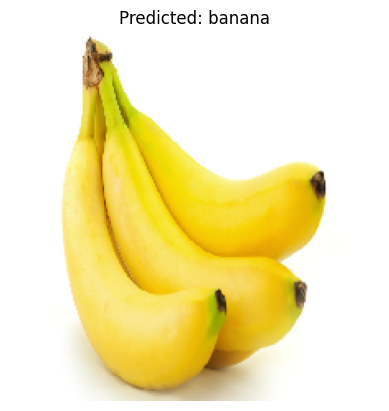

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


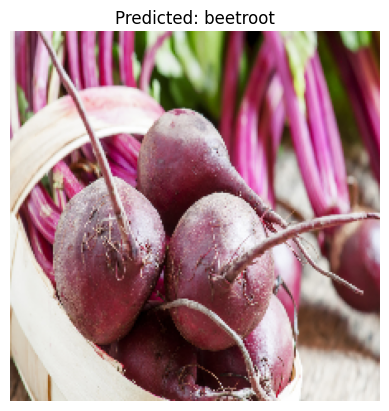

'beetroot'

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

def predict_image(img_path):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(224, 224))  # Resize image to 224x224
    img_array = image.img_to_array(img) / 255.0  # Convert to array and normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Make prediction
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions)]  # Get the class with highest probability

    # Display the image with prediction
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class}")
    plt.axis('off')
    plt.show()

    return predicted_class

# Example: Test on a random image
predict_image("../fruit_veggie_classification/test/banana/Image_4.jpg")  # Change to any image path
predict_image("../fruit_veggie_classification/test/beetroot/Image_10.jpg")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


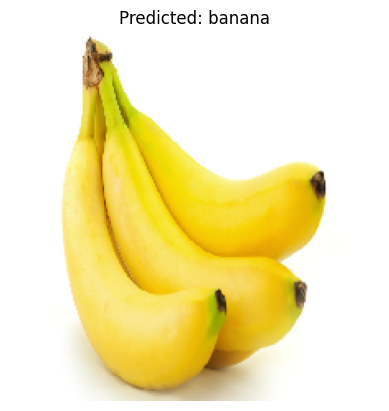

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


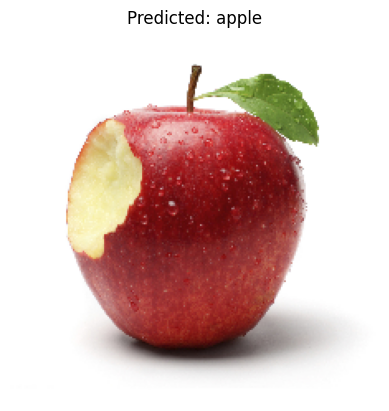

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


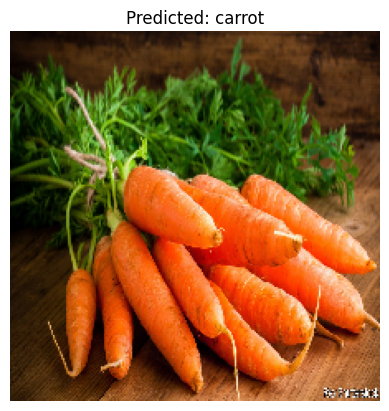

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


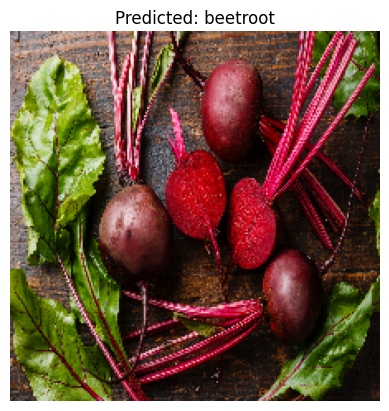

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


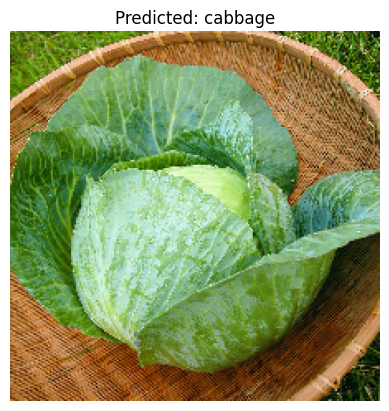

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


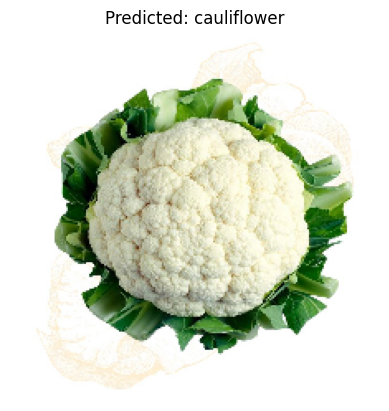

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


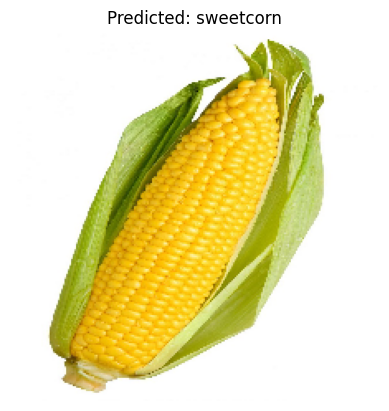

Predicted: ['banana', 'apple', 'carrot', 'beetroot', 'cabbage', 'cauliflower', 'sweetcorn'] (type: <class 'list'>)

**Diet Recommendation:**
Detected in images: ['Banana', 'Apple', 'Carrot', 'Beetroot', 'Cabbage', 'Cauliflower', 'Sweetcorn']
You are missing these important food items from your diet:
Spinach, Broccoli, Tomato, Lettuce, Potato, Grapes, Soy Bean


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Map indices to fruit/vegetable names (or adjust based on your actual model's class names)
fruits_and_vegs = {
    0: "Banana",
    1: "Apple",
    2: "Pear",
    3: "Grapes",
    4: "Orange",
    5: "Kiwi",
    6: "Watermelon",
    7: "Pomegranate",
    8: "Pineapple",
    9: "Mango",  # Assuming class 10 is Mango, adjust according to your model
    10: "Cucumber",
    11: "Carrot",
    12: "Capsicum",
    13: "Onion",
    14: "Potato",
    15: "Lemon",
    16: "Tomato",
    17: "Raddish",
    18: "Beetroot",
    19: "Cabbage",
    20: "Lettuce",
    21: "Spinach",
    22: "Soy Bean",
    23: "Cauliflower",
    24: "Bell Pepper",
    25: "Chilli Pepper",
    26: "Turnip",
    27: "Corn",
    28: "Sweetcorn",
    29: "Sweet Potato",  
    30: "Paprika",
    31: "Jalepeño",
    32: "Ginger",
    33: "Garlic",
    34: "Peas",
    35: "Eggplant"
}

# Recommended diet (you can adjust the list as needed)
recommended_diet = ["Apple", "Banana", "Spinach", "Carrot", "Broccoli", "Tomato", "Lettuce", "Potato", "Grapes", "Soy Bean"]
def diet_advice(detected_items):
    print(f"Predicted: {detected_items} (type: {type(detected_items)})")
    
    # Make comparison case-insensitive 
    detected_items_final = [item.strip().title() for item in detected_items]

    missing_items = [item for item in recommended_diet if item not in detected_items_final]

    print("\n**Diet Recommendation:**")
    print(f"Detected in images: {detected_items_final}")

    if missing_items:
        print("You are missing these important food items from your diet:")
        print(", ".join(missing_items))
    else:
        print("Great job! Your diet looks balanced.")


def predict_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions)
    predicted_class = class_names[predicted_class_index]

    # Show prediction
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class}")
    plt.axis('off')
    plt.show()

    return predicted_class

predicted_items = []
predicted_items.append(predict_image("../fruit_veggie_classification/test/banana/Image_4.jpg"))
predicted_items.append(predict_image("../fruit_veggie_classification/test/apple/Image_1.jpg"))
predicted_items.append(predict_image("../fruit_veggie_classification/test/carrot/Image_1.jpg"))
predicted_items.append(predict_image("../fruit_veggie_classification/test/beetroot/Image_1.jpg"))
predicted_items.append(predict_image("../fruit_veggie_classification/test/cabbage/Image_1.jpg"))
predicted_items.append(predict_image("../fruit_veggie_classification/test/cauliflower/Image_4.jpg"))
predicted_items.append(predict_image("../fruit_veggie_classification/test/corn/Image_.jpg"))

diet_advice(predicted_items)